In [1]:
import scigym
from player import MCTS, AlphaZero
from utils import save_record, load_record
import matplotlib.pyplot as plt

# Experiments

In [2]:
record_path = "records/"
record_mcts = ["mcts_0_3.csv", "mcts_0_5.csv", "mcts_1_3.csv", "mcts_1_5.csv"]
record_az = ["az_0_3.csv", "az_0_5.csv", "az_1_3.csv", "az_1_5.csv"]

model_path = "saved_models/"
model_files = ['0_3.pt', '0_5.pt', '1_3.pt', '1_5.pt']

In [3]:
env_id = "toricgame-v0"
error_rates = [i * 0.02 for i in range(1, 11)]
simulation_times = 1000
evaluation_times = 1000

## Bit-flip error

### Board_size = 3 (ongoing...)

In [4]:
KWARGS = {'error_model': 0, 'board_size': 3}
env = scigym.make(env_id, **KWARGS)
mcts_player = MCTS(env, simulation_times)
az_player = AlphaZero(env, simulation_times)

In [5]:
evals = []
for er in error_rates:
    env.error_rate = er
    evals.append(mcts_player.evaluation(evaluation_times))
save_record(record_path + record_mcts[0], evals)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [21:04<00:00,  1.26s/it]


### Board_size = 5 (ongoing...)

In [6]:
KWARGS = {'error_model': 0, 'board_size': 5}
env = scigym.make(env_id, **KWARGS)
mcts_player = MCTS(env, simulation_times)
az_player = AlphaZero(env, simulation_times)

In [7]:
evals = []
for er in error_rates:
    env.error_rate = er
    evals.append(mcts_player.evaluation(evaluation_times))
save_record(record_path + record_mcts[1], evals)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [39:11<00:00,  2.35s/it]


## Depolarizing error

### Board_size = 3 (finished)

In [4]:
KWARGS = {'error_model': 1, 'board_size': 3}
env = scigym.make(env_id, **KWARGS)
mcts_player = MCTS(env, simulation_times)
az_player = AlphaZero(env, simulation_times)

In [9]:
evals = []
for er in error_rates:
    env.error_rate = er
    evals.append(mcts_player.evaluation(evaluation_times))
save_record(record_path + record_mcts[2], evals)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [26:41<00:00,  1.60s/it]


In [5]:
evals = []
az_player.nn.load(model_path + model_file[2])
for er in error_rates:
    env.error_rate = er
    evals.append(az_player.evaluation(evaluation_times))
save_record(record_path + record_az[2], evals)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [1:27:42<00:00,  5.26s/it]


### Board_size = 5 (ongoing...)

In [6]:
KWARGS = {'error_model': 1, 'board_size': 5}
env = scigym.make(env_id, **KWARGS)
mcts_player = MCTS(env, simulation_times)
az_player = AlphaZero(env, simulation_times)

In [ ]:
evals = []
for er in error_rates:
    env.error_rate = er
    evals.append(mcts_player.evaluation(evaluation_times))
save_record(record_path + record_mcts[3], evals)

# Figures 

## Bit-flip error

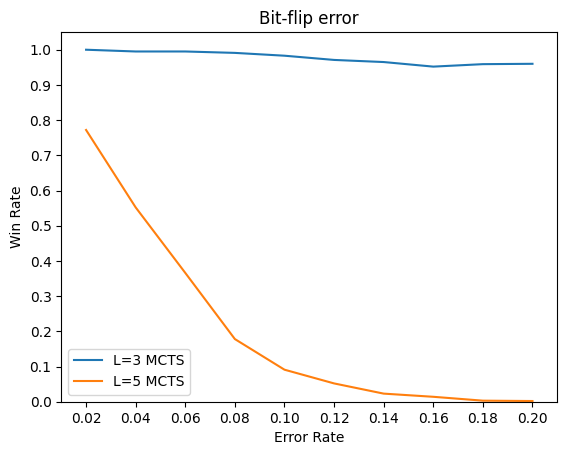

In [21]:
plt.xticks(error_rates)
plt.xlabel('Error Rate')
plt.xlim([0.01, 0.21])

plt.yticks([i * 0.1 for i in range(0, 11)])
plt.ylim([0, 1.05])
plt.ylabel('Win Rate')

plt.title('Bit-flip error')
plt.plot(error_rates, load_record(record_path + record_mcts[0]), label='L=3 MCTS')
plt.plot(error_rates, load_record(record_path + record_mcts[1]), label='L=5 MCTS')
plt.legend()
plt.show()

## Depolarizing error

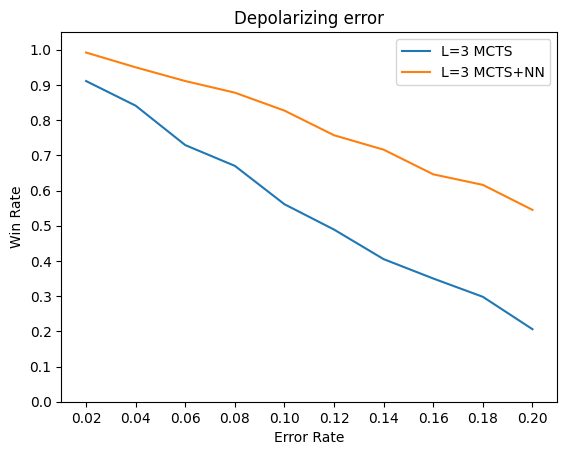

In [19]:
plt.xticks(error_rates)
plt.xlabel('Error Rate')
plt.xlim([0.01, 0.21])

plt.yticks([i * 0.1 for i in range(0, 11)])
plt.ylim([0, 1.05])
plt.ylabel('Win Rate')

plt.title('Depolarizing error')
plt.plot(error_rates, load_record(record_path + record_mcts[2]), label='L=3 MCTS')
# plt.plot(error_rates, load_record(record_path + record_mcts[3]), label='L=3 MCTS')
plt.plot(error_rates, load_record(record_path + record_az[2]), label='L=3 MCTS+NN')
plt.legend()
plt.show()